In [6]:
import pandas as pd
data = pd.read_csv("C:/Users/prana/Downloads/SS2025Dataset.csv")

# few rows of data
print(data.head())

# summary of the dataset
print(data.info())

# basic statistics
print(data.describe())


   UserID  CustomerAge     Sex  Tenure  ServiceUsageRate  SupportCalls  \
0       1           55    Male      20                24             4   
1       2           28    Male      27                30             4   
2       3           65  Female      60                17             7   
3       4           53    Male      47                16             8   
4       5           32    Male      56                 5             7   

   BillingDelay  PlanType AgreementDuration  TotalExpenditure  RecentActivity  \
0             6  Standard           Monthly               635              25   
1             5   Premium         Quarterly               631              10   
2            16   Premium         Quarterly               314               1   
3             7   Premium            Annual               527              13   
4            15   Premium            Annual               236              25   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      0  
<c

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Sex', 'PlanType', 'AgreementDuration']

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Drop the 'UserID' column
data = data.drop(columns=['UserID'])
print(data.head())


   CustomerAge  Sex  Tenure  ServiceUsageRate  SupportCalls  BillingDelay  \
0           55    1      20                24             4             6   
1           28    1      27                30             4             5   
2           65    0      60                17             7            16   
3           53    1      47                16             8             7   
4           32    1      56                 5             7            15   

   PlanType  AgreementDuration  TotalExpenditure  RecentActivity  Churn  
0         2                  1               635              25      0  
1         1                  2               631              10      0  
2         1                  2               314               1      1  
3         1                  0               527              13      0  
4         1                  0               236              25      0  


In [8]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Churn'])  # Features
y = data['Churn']  # Target

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (12874, 10)
Testing data shape: (3219, 10)


In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# predictions
y_pred = rf_model.predict(X_test)

# Model Stats
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[1660    4]
 [   7 1548]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1664
           1       1.00      1.00      1.00      1555

    accuracy                           1.00      3219
   macro avg       1.00      1.00      1.00      3219
weighted avg       1.00      1.00      1.00      3219


Accuracy Score: 0.9965827896862379


In [11]:
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance.sort_values(by='Importance', ascending=False))


             Feature  Importance
5       BillingDelay    0.442477
4       SupportCalls    0.155702
2             Tenure    0.112814
3   ServiceUsageRate    0.080699
1                Sex    0.070194
8   TotalExpenditure    0.045771
0        CustomerAge    0.041970
7  AgreementDuration    0.033814
9     RecentActivity    0.012104
6           PlanType    0.004456


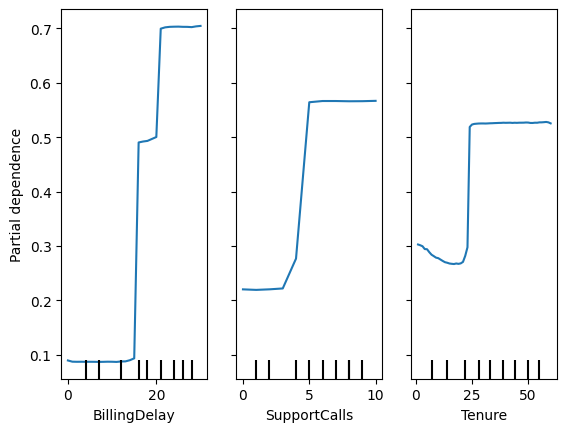

In [16]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Select specific features
features_to_plot = ['BillingDelay', 'SupportCalls', 'Tenure']

# partial dependence plots
PartialDependenceDisplay.from_estimator(rf_model, X_test, features=features_to_plot, feature_names=X.columns)
plt.show()
